In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
%pwd

'C:\\Users\\user\\Desktop\\DS_ysp\\pr\\Block-IO\\Block-IO\\sc_vz_dm'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a_l = [web_0, web_1, web_2, web_3, mds_0, mds_1, wdev_0, wdecv_1, wdev_2, wdev_3]

u3_col = ['Type', 'Offset', 'Size']
dp_col = ['Type', 'Offset', 'Size', 'ResponseTime']

for i in a_l:
    tt_df = pd.read_csv(f'./dp_{i}.csv',names=dp_col)
    print(f'dp_{i} 결측 ')
    print(tt_df.isnull().sum())

dp_usr_0 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_usr_1 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_usr_2 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_prxy_0 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_prxy_1 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_src1_0 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_src1_1 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_src1_2 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_src2_0 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_src2_1 결측 
Type            0
Offset          0
Size            0
ResponseTime    0
dtype: int64
dp_src2_2 결측 

In [4]:
for i in a_l:
    dp_df = pd.read_csv(f'./dp_{i}.csv',names=dp_col)
    u3_df = dp_df.drop(labels='ResponseTime', axis=1)
    x = dp_df.duplicated().sum()
    y = u3_df.duplicated().sum()
    print(f'dp_{i:7} 중복 row : {x:7},   u3_{i:7} 중복 row : {y:7},   두개의 차이 = {y-x:7}', end='\n')

dp_usr_0   중복 row :    3102,   u3_usr_0   중복 row :   54609,   두개의 차이 =   51507
dp_usr_1   중복 row :    3904,   u3_usr_1   중복 row :   22438,   두개의 차이 =   18534
dp_usr_2   중복 row :    1926,   u3_usr_2   중복 row :   14598,   두개의 차이 =   12672
dp_prxy_0  중복 row :   13913,   u3_prxy_0  중복 row :   88438,   두개의 차이 =   74525
dp_prxy_1  중복 row :    8529,   u3_prxy_1  중복 row :   83297,   두개의 차이 =   74768
dp_src1_0  중복 row :      13,   u3_src1_0  중복 row :     422,   두개의 차이 =     409
dp_src1_1  중복 row :    2301,   u3_src1_1  중복 row :    6514,   두개의 차이 =    4213
dp_src1_2  중복 row :   13724,   u3_src1_2  중복 row :   45178,   두개의 차이 =   31454
dp_src2_0  중복 row :   56095,   u3_src2_0  중복 row :   85474,   두개의 차이 =   29379
dp_src2_1  중복 row :     379,   u3_src2_1  중복 row :    8913,   두개의 차이 =    8534
dp_src2_2  중복 row :    3879,   u3_src2_2  중복 row :    9165,   두개의 차이 =    5286


'ResponseTime' 의 경우 스토리지의 상태에 따라 반응 속도의 차이가 있을 수 있기에 같은 'Offset'에서의 호출인지 확인 하기 위해 'Type', 'Offset', 'Size'만을 사용하여 평가

dp의 경우 'ResponseTime'를 삭제 하지 않아 스토리지의 상태에 따른 차이로 인해 원하는 결과를 얻지 못하는 문제가 발생 'ResponseTime'을 제거한 u3을 이용 하여 원하는 결과 도출 u3와 dp의 비교로 전처리에 따른 결과를 표현 가능

스토리지 상태에 따라 같은 'Offset'을 불러들여져 와도 'ResponseTime'은 다를 가능성이 높음

In [19]:
#1.

for i in a_l:
    tt_df = pd.read_csv(f'./dp_{i}.csv',names=dp_col)
    tt_df = tt_df.drop(labels='ResponseTime', axis=1)
    
    ratio = tt_df.Type.value_counts()
    labels = tt_df.Type.value_counts().index
    plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=90, counterclock=False)
    plt.title(f'{i} I/O Ratio')
    plt.gcf().subplots_adjust(bottom=0.20)
    plt.savefig(f'1 {i}', bbox_inches = 'tight')
    plt.close()

In [43]:

# from sklearn.preprocessing import LabelEncoder


# def lab_pd(df):
#     le = LabelEncoder()
#     le.fit(df)
#     return le.transform(df)

# f_l = ['ts_0', 'usr_0', 'stg_0', 'stg_1', 'rsrch_0', 'hm_1', 'hm_0']
# col = ['Timestamp', 'Hostname', 'DiskNumber', 'Type', 'Offset', 'Size', 'ResponseTime']

# for i in f_l:
#     tt_df = pd.read_csv(f'./{i}.csv',names=col)
#     tt_df = tt_df.iloc[:, 3:6]
#     tt_df['Type'] = lab_pd(tt_df['Type'])
    
#     ratio = tt_df.Type.value_counts()
#     labels = tt_df.Type.value_counts().index
#     plt.pie(ratio, labels=labels, autopct='%.2f%%', startangle=90, counterclock=False)
#     plt.title(f'{i} I/O Ratio')
#     plt.savefig(f'1-2 {i}', bbox_inches = 'tight')
#     plt.close()


In [22]:
# 2. -1

import seaborn as sns

sns.set_style('darkgrid')

import math

def offset_log(x):
    return math.log(x, 2)

for i in a_l:
    tt_df = pd.read_csv(f'./dp_{i}.csv',names=dp_col)
    tt_df = tt_df.drop(labels='ResponseTime', axis=1)

    
    xx = tt_df.Offset.value_counts()
    df_f = xx.rename('Frequency').reset_index()
    df_f = df_f.rename(columns={'index':'Offset'})

    df_f_min = df_f.Offset.min()
    df_f_max = df_f.Offset.max()
    df_f_min = math.log(df_f_min, 2)
    df_f_max = math.log(df_f_max, 2)
    
    df_f['Offset_log'] = df_f.Offset.apply(offset_log)

#     print(f'u3_{i:10}  : ', end='\n')
    sns.scatterplot(data=df_f, x='Offset', y='Frequency')
#     sns.scatterplot(data=df_f, x='Offset_log', y='Frequency')
#     plt.xlim([df_f_min, df_f_max])
    plt.gca().axes.xaxis.set_visible(False)
    plt.title(f'{i}')
#     plt.show()
    plt.savefig(f'2 -1 {i}', bbox_inches = 'tight')
    plt.close()

In [42]:
# 2. -2
for i in a_l:
    tt_df = pd.read_csv(f'./dp_{i}.csv',names=dp_col)
    tt_df = tt_df.drop(labels='ResponseTime', axis=1)
    x = tt_df.Offset.value_counts().loc[lambda x : x > 600]
    
    plt.pie(
        x,
        startangle=90,
        counterclock=False
    ) 

    plt.title(f'Ratio of Frequency in {i}')
#     plt.show()
    plt.savefig(f'2 {i}', bbox_inches = 'tight')
    plt.close()

In [ ]:
# 2. -3

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a_l = ['usr_0', 'usr_1', 'usr_2', 'prxy_0', 'prxy_1', 'src1_0', 'src1_1', 'src1_2', 'src2_0', 'src2_1', 'src2_2']

dp_col = ['Type', 'Offset', 'Size', 'ResponseTime']

for i in a_l:
    tt_df = pd.read_csv(f'./dp_{i}.csv',names=dp_col)
    tt_df = tt_df.drop(labels='ResponseTime', axis=1)
    
    top = 100
    offset = tt_df.Offset.value_counts().head(top)
    olabels = tt_df.Offset.value_counts().head(top).index
    plt.pie(offset, startangle=90, counterclock=False)
    plt.title(f'The Top{top} Offsets Ratio of {i}')

    plt.savefig(f'2 -3 {i}', bbox_inches = 'tight')
    plt.close()

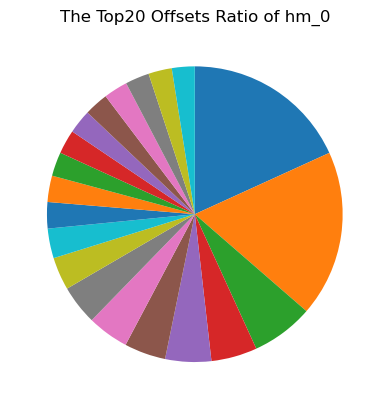

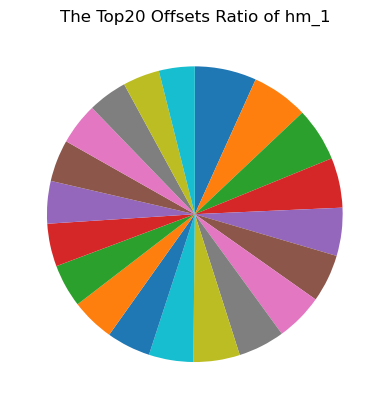

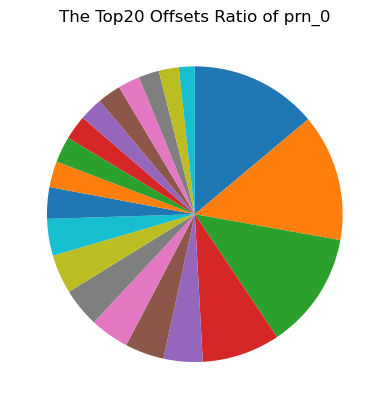

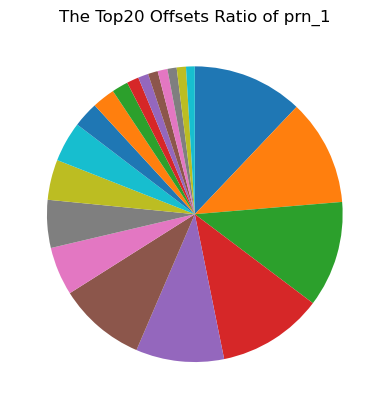

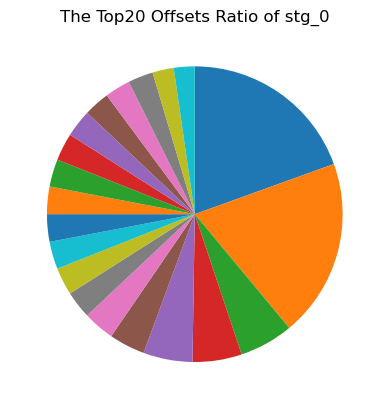

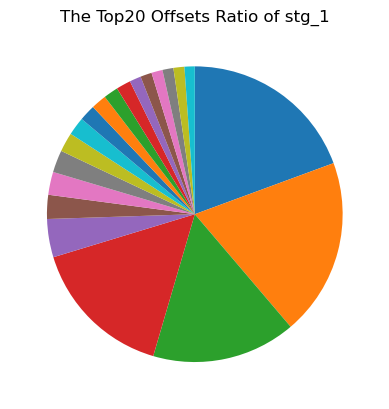

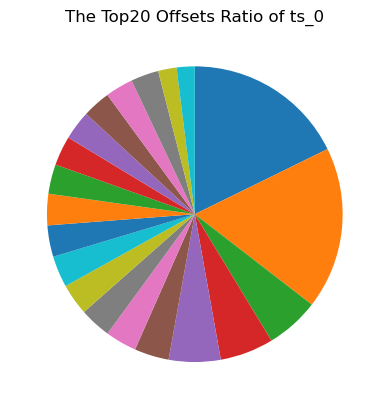

In [5]:
# 2. -4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

a_l = ['usr_0', 'usr_1', 'usr_2', 'prxy_0', 'prxy_1', 'src1_0', 'src1_1', 'src1_2', 'src2_0', 'src2_1', 'src2_2']
dp_col = ['Type', 'Offset', 'Size', 'ResponseTime']

for i in a_l:
    tt_df = pd.read_csv(f'./dp_{i}.csv',names=dp_col)
    tt_df = tt_df.drop(labels='ResponseTime', axis=1)
    
    top = 20
    offset = tt_df.Offset.value_counts().head(top)
    olabels = tt_df.Offset.value_counts().head(top).index
    plt.pie(offset, startangle=90, counterclock=False)
    plt.title(f'The Top{top} Offsets Ratio of {i}')

    plt.savefig(f'2 -4 {i}', bbox_inches = 'tight')
    plt.close()